<a href="https://colab.research.google.com/github/ishgirwan/hdi/blob/master/karnataka_hdi_dw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data wrangling of Karnataka HDI data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install tabula-py
#import tabula

# Read pdf into list of DataFrame
#df = tabula.read_pdf("/content/drive/My Drive/omdena/VillageHDIintheState.pdf", pages='all')
#tabula.convert_into("/content/drive/My Drive/omdena/VillageHDIintheState.pdf", "/content/drive/My Drive/omdena/karnataka_hdi.csv", output_format="csv", pages='all')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv("/content/drive/My Drive/omdena_hdi/data/karnataka_hdi.csv")

In [ ]:
df.head()

,District,Taluk,Gram Panchayat,Village,Standard of\rliving index,Rank,Health\rIndex,Rank.1,Education\rIndex,Rank.2,HDI,Rank.3
0,Bengaluru Urban,Bengaluru North,Arakere,Arakere,0.69966,1.0,1.00000,1.0,0.60993,4796.0,0.75287,1.0
1,Bengaluru Urban,Bengaluru North,Vaderahalli,Shamarajpura,0.69553,2.0,0.97289,22344.0,0.61509,3765.0,0.74663,2.0
2,Bengaluru Urban,Bengaluru North,Kasagattapura,Kasagattapura,0.49102,76.0,1.00000,1.0,0.81767,2.0,0.73772,3.0
3,Bengaluru Urban,Bengaluru North,Adakamaranahalli,Makali,0.63767,3.0,1.00000,1.0,0.59298,8643.0,0.72313,4.0
4,Bengaluru Urban,Bengaluru North,Shivakote,Kalenahalli,0.62548,5.0,1.00000,1.0,0.60343,6110.0,0.72268,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27077 entries, 0 to 27076
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  27075 non-null  object 
 1   Taluk                     27075 non-null  object 
 2   Gram Panchayat            27075 non-null  object 
 3   Village                   27076 non-null  object 
living index  27075 non-null  object 
 5   Rank                      27075 non-null  float64
Index              27075 non-null  float64
 7   Rank.1                    27075 non-null  float64
Index           27075 non-null  float64
 9   Rank.2                    27075 non-null  float64
 10  HDI                       27075 non-null  float64
 11  Rank.3                    27075 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.5+ MB


In [ ]:
df = df.rename(columns={'Education\rIndex': 'Education_Index', 'Health\rIndex': 'Health_Index', 'Standard of\rliving index': 'Standard_of_living_index' })

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27077 entries, 0 to 27076
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  27075 non-null  object 
 1   Taluk                     27075 non-null  object 
 2   Gram Panchayat            27075 non-null  object 
 3   Village                   27076 non-null  object 
 4   Standard_of_living_index  27075 non-null  object 
 5   Rank                      27075 non-null  float64
 6   Health_Index              27075 non-null  float64
 7   Rank.1                    27075 non-null  float64
 8   Education_Index           27075 non-null  float64
 9   Rank.2                    27075 non-null  float64
 10  HDI                       27075 non-null  float64
 11  Rank.3                    27075 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
count,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,13537.998892,0.990887,4476.054700,0.565508,13520.742678,0.406786,13537.999040
std,7816.023177,0.029470,9279.955049,0.049246,7844.352578,0.106000,7816.023077
min,1.000000,0.238490,1.000000,0.001560,1.000000,0.003700,1.000000
25%,6769.500000,1.000000,1.000000,0.540910,6769.500000,0.341950,6769.500000
50%,13538.000000,1.000000,1.000000,0.573840,13538.000000,0.419730,13538.000000
75%,20306.500000,1.000000,1.000000,0.600645,20306.000000,0.480575,20306.500000
max,27075.000000,1.000000,27075.000000,0.957010,27075.000000,0.752870,27075.000000


In [ ]:
df.Village.value_counts()

Hosahalli              98
Kodihalli              47
Siddapura              39
Kurubarahalli          36
Honnenahalli           36
                       ..
Rupanagudi              1
Bilkerur                1
Muttige\r(gunjagod)     1
Kombinakai              1
Adakatahalli            1
Name: Village, Length: 20581, dtype: int64

There are several villages with same names.

In [ ]:
df.loc[(df.District == 'Bengaluru Rural') & (df.Village == 'Hosahalli')]

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
1827,Bengaluru Rural,Nelamangala,Honnenahalli,Hosahalli,0.27055,2273.0,1.0,1.0,0.60920,4946.0,0.54828,1828.0
4751,Bengaluru Rural,Devanahalli,Bijjawara,Hosahalli,0.20297,6158.0,1.0,1.0,0.62446,1237.0,0.50232,4752.0
23654,Bengaluru Rural,Devanahalli,Bettakote,Hosahalli,0.04614,23039.0,1.0,1.0,0.48854,25350.0,0.28249,23655.0
26798,Bengaluru Rural,Nelamangala,Soladevanahalli,Hosahalli,0.00234,26829.0,1.0,1.0,0.61045,4667.0,0.11260,26799.0


In [ ]:
df['District'].unique()

array(['Bengaluru Urban', 'Ballari', 'Dakshina Kannada', 'Uttara Kannada',
       'Bengaluru Rural', 'Shivamogga', 'Belagavi', 'Kodagu',
       'Chikkamagalur', 'Kolar', 'Ramanagara', 'Mysuru', 'Udupi',
       'Chitradurga', 'Mandya', 'Hassan', 'Tumakuru', 'Davanagere',
       'Chikkaballapura', 'Dharwad', 'Gadag', 'Chamarajanagara',
       'Chamarajanagar', 'Bagalkot', 'Haveri', 'Koppal', 'Bidar',
       'Kalaburagi', 'Vijayapura', 'Yadgir', 'Raichur', nan], dtype=object)

In [ ]:
df.loc[df['District'].isnull()]

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
27074,NaN,NaN,NaN,Chikkathekalavat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27075,NaN,NaN,NaN,NaN,0.00003,27067.0,1.0,1.0,0.00198,27068.0,0.0037,27075.0


In [ ]:
df = df[df['District'].notna()]

In [ ]:
df['District'].isnull().values.any()

False

In [ ]:
df['District'].unique()

array(['Bengaluru Urban', 'Ballari', 'Dakshina Kannada', 'Uttara Kannada',
       'Bengaluru Rural', 'Shivamogga', 'Belagavi', 'Kodagu',
       'Chikkamagalur', 'Kolar', 'Ramanagara', 'Mysuru', 'Udupi',
       'Chitradurga', 'Mandya', 'Hassan', 'Tumakuru', 'Davanagere',
       'Chikkaballapura', 'Dharwad', 'Gadag', 'Chamarajanagara',
       'Chamarajanagar', 'Bagalkot', 'Haveri', 'Koppal', 'Bidar',
       'Kalaburagi', 'Vijayapura', 'Yadgir', 'Raichur'], dtype=object)

In [ ]:
df['District'].nunique()

31

In [ ]:
df['District'].replace('Chamarajanagar', 'Chamarajanagara', inplace=True);

In [ ]:
df['District'].unique()

array(['Bengaluru Urban', 'Ballari', 'Dakshina Kannada', 'Uttara Kannada',
       'Bengaluru Rural', 'Shivamogga', 'Belagavi', 'Kodagu',
       'Chikkamagalur', 'Kolar', 'Ramanagara', 'Mysuru', 'Udupi',
       'Chitradurga', 'Mandya', 'Hassan', 'Tumakuru', 'Davanagere',
       'Chikkaballapura', 'Dharwad', 'Gadag', 'Chamarajanagara',
       'Bagalkot', 'Haveri', 'Koppal', 'Bidar', 'Kalaburagi',
       'Vijayapura', 'Yadgir', 'Raichur'], dtype=object)

In [ ]:
df['District'].nunique()

30

In [ ]:
df['HDI'].isnull().values.any()

True

In [ ]:
df.loc[df['HDI'].isnull()]

,District,Taluk,Gram Panchayat,Village,Standard_of_living_index,Rank,Health_Index,Rank.1,Education_Index,Rank.2,HDI,Rank.3
27076,Chitradurga,Hosadurga,Chikkabyladakere,ti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['HDI'].notna()]

In [ ]:
df['HDI'].isnull().values.any()

False

In [ ]:
df['Taluk'].isnull().values.any()

False

In [ ]:
df['Gram Panchayat'].isnull().values.any()

False

In [ ]:
df.isnull().values.any()

False

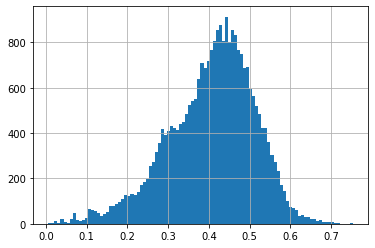

In [ ]:
hdi_hist = df['HDI'].hist(bins=100)

The HDI data distribution looks like a normal distribution.

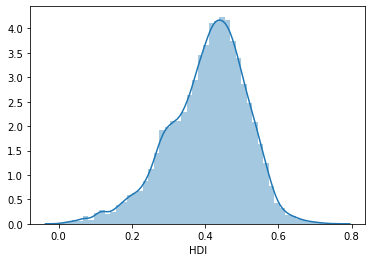

In [ ]:
sns.distplot(df['HDI']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27074 entries, 0 to 27073
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   District                  27074 non-null  object 
 1   Taluk                     27074 non-null  object 
 2   Gram Panchayat            27074 non-null  object 
 3   Village                   27074 non-null  object 
 4   Standard_of_living_index  27074 non-null  object 
 5   Rank                      27074 non-null  float64
 6   Health_Index              27074 non-null  float64
 7   Rank.1                    27074 non-null  float64
 8   Education_Index           27074 non-null  float64
 9   Rank.2                    27074 non-null  float64
 10  HDI                       27074 non-null  float64
 11  Rank.3                    27074 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.7+ MB


In [ ]:
cols = [4,5,6,7,8,9]
df.drop(df.columns[cols], axis =1, inplace=True);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27074 entries, 0 to 27073
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        27074 non-null  object 
 1   Taluk           27074 non-null  object 
 2   Gram Panchayat  27074 non-null  object 
 3   Village         27074 non-null  object 
 4   HDI             27074 non-null  float64
 5   Rank.3          27074 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
df.head(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
0,Bengaluru Urban,Bengaluru North,Arakere,Arakere,0.75287,1.0
1,Bengaluru Urban,Bengaluru North,Vaderahalli,Shamarajpura,0.74663,2.0
2,Bengaluru Urban,Bengaluru North,Kasagattapura,Kasagattapura,0.73772,3.0
3,Bengaluru Urban,Bengaluru North,Adakamaranahalli,Makali,0.72313,4.0
4,Bengaluru Urban,Bengaluru North,Shivakote,Kalenahalli,0.72268,5.0
5,Bengaluru Urban,Bengaluru North,Madanayakanahalli,Kadaranahalli,0.72218,6.0
6,Bengaluru Urban,Anekal,Vanakanahalli,Menasiganahalli,0.72205,7.0
7,Bengaluru Urban,Bengaluru North,Huskur,Huskur,0.72088,8.0
8,Bengaluru Urban,Bengaluru South,Nelaguli,Naganayakanaha\rlli,0.71940,9.0
9,Bengaluru Urban,Bengaluru South,Chikkana halli,Sulivara,0.71499,10.0


In [ ]:
df.replace(" ","", inplace=True, regex=True)

In [ ]:
df.replace("\r","", inplace=True, regex=True)

In [ ]:
df.head(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
0,BengaluruUrban,BengaluruNorth,Arakere,Arakere,0.75287,1.0
1,BengaluruUrban,BengaluruNorth,Vaderahalli,Shamarajpura,0.74663,2.0
2,BengaluruUrban,BengaluruNorth,Kasagattapura,Kasagattapura,0.73772,3.0
3,BengaluruUrban,BengaluruNorth,Adakamaranahalli,Makali,0.72313,4.0
4,BengaluruUrban,BengaluruNorth,Shivakote,Kalenahalli,0.72268,5.0
5,BengaluruUrban,BengaluruNorth,Madanayakanahalli,Kadaranahalli,0.72218,6.0
6,BengaluruUrban,Anekal,Vanakanahalli,Menasiganahalli,0.72205,7.0
7,BengaluruUrban,BengaluruNorth,Huskur,Huskur,0.72088,8.0
8,BengaluruUrban,BengaluruSouth,Nelaguli,Naganayakanahalli,0.71940,9.0
9,BengaluruUrban,BengaluruSouth,Chikkanahalli,Sulivara,0.71499,10.0


In [ ]:
df['Taluk'].nunique()

176

In [ ]:
df['Taluk'].unique()

array(['BengaluruNorth', 'Anekal', 'BengaluruSouth', 'Hospet',
       'BengaluruEast', 'Mangaluru', 'Karwar', 'Doddaballapur',
       'Shivamogga', 'Belagavi', 'Somvarpet', 'Mudigere', 'Sirsi',
       'Bangarapet', 'Channapatna', 'Mysuru', 'Udupi', 'Devanahalli',
       'Kundapura', 'Nelamangala', 'Virajpet', 'Ramanagara', 'Hosanagara',
       'Madikere', 'Siddapur', 'Holalkere', 'Shrirangapattana', 'Hassan',
       'Tumakuru', 'Karkal', 'Hunsur', 'Bhatkal', 'Hiriyur',
       'Chikkamagalur', 'Heggadadevankote', 'Sorab', 'Sakleshpur',
       'Malur', 'Bantval', 'Sulya', 'Tirumakudal-Narsip', 'Harihar',
       'Sagar', 'Nanjangud', 'Tirthahalli', 'Davanagere', 'Bagepalli',
       'Yellapur', 'Hosakote', 'Beltangadi', 'Hubli', 'Koppa', 'Gubbi',
       'Malavalli', 'Arkalgud', 'Magadi', 'Chikkaballapura', 'Dharwad',
       'Puttur', 'Jagalur', 'Maddur', 'Gauribidanur', 'Tarikere',
       'Krishnarajpet', 'Kanakapura', 'Koratagere', 'Bhadravati',
       'Piriyapatna', 'Krishnarajanagara', 

In [ ]:
df['Gram Panchayat'].nunique()

5574

In [ ]:
df['Gram Panchayat'].unique()

array(['Arakere', 'Vaderahalli', 'Kasagattapura', ...,
       'Notunderanypanchayat', 'Maidala', 'Gadinadforest'], dtype=object)

In [ ]:
#df[['Gram Panchayat','gp_extra_info']] = df['Gram Panchayat'].str.split('(',expand=True)
#df['Gram Panchayat'].str.replace(r"\(.*\)","", inplace=True)
df.replace(r"\(.*\)","", inplace=True, regex=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27074 entries, 0 to 27073
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        27074 non-null  object 
 1   Taluk           27074 non-null  object 
 2   Gram Panchayat  27074 non-null  object 
 3   Village         27074 non-null  object 
 4   HDI             27074 non-null  float64
 5   Rank.3          27074 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.4+ MB


In [ ]:
df.sample(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
5675,BengaluruRural,Hosakote,Jadigenahalli,Kurubaragollahalli,0.49211,5676.0
13965,Kalaburagi,Chincholi,Siroli,Rudnoor,0.41591,13966.0
21569,Yadgir,Yadgir,Saidapur,Balched,0.32024,21570.0
10746,Chikkamagalur,Chikkamagalur,Kadavanthi,Basapura,0.44399,10747.0
791,Chikkamagalur,Chikkamagalur,Allampura,Karadihallikaval,0.57720,792.0


In [ ]:
# convert to csv
df.to_csv('/content/drive/My Drive/omdena/cleaned_karnataka_hdi.csv', index=False, header=True)

In [3]:
df_cleaned = pd.read_csv("/content/drive/My Drive/omdena_hdi/data/cleaned_karnataka_hdi.csv")

In [4]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27074 entries, 0 to 27073
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        27074 non-null  object 
 1   Taluk           27074 non-null  object 
 2   Gram Panchayat  27074 non-null  object 
 3   Village         27074 non-null  object 
 4   HDI             27074 non-null  float64
 5   Rank.3          27074 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.2+ MB


In [5]:
df_cleaned['District'].unique()

array(['BengaluruUrban', 'Ballari', 'DakshinaKannada', 'UttaraKannada',
       'BengaluruRural', 'Shivamogga', 'Belagavi', 'Kodagu',
       'Chikkamagalur', 'Kolar', 'Ramanagara', 'Mysuru', 'Udupi',
       'Chitradurga', 'Mandya', 'Hassan', 'Tumakuru', 'Davanagere',
       'Chikkaballapura', 'Dharwad', 'Gadag', 'Chamarajanagara',
       'Bagalkot', 'Haveri', 'Koppal', 'Bidar', 'Kalaburagi',
       'Vijayapura', 'Yadgir', 'Raichur'], dtype=object)

In [6]:
df_cleaned['District'].nunique()

30

In [7]:
#df_cleaned['Taluk'].unique()

In [8]:
df_cleaned['Taluk'].nunique()

176

In [9]:
df_cleaned['Gram Panchayat'].unique()

array(['Arakere', 'Vaderahalli', 'Kasagattapura', ...,
       'Notunderanypanchayat', 'Maidala', 'Gadinadforest'], dtype=object)

In [10]:
df_cleaned['Gram Panchayat'].nunique()

5543

In [11]:
df_cleaned.sample(5)

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
19620,Bagalkot,Bilgi,Kollur,Mundaganur,0.35272,19621.0
15784,Tumakuru,Sira,Neralagudda,Ajjenahalli,0.39841,15785.0
21444,Shivamogga,Shivamogga,Kommanalu,Bikkonahalli,0.32239,21445.0
5305,UttaraKannada,Siddapur,Halgeri,Nagarbhavi,0.49614,5306.0
10025,Belagavi,Belagavi,Muthnal,VIRAPANKOPPA,0.45049,10026.0


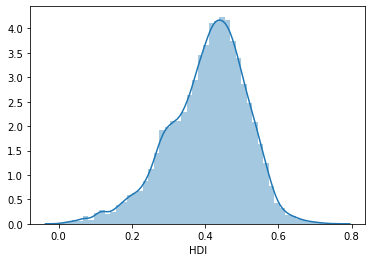

In [12]:
sns.distplot(df_cleaned['HDI']);

In [13]:
df_cleaned['Village'].nunique()

20221

In [14]:
df_codes = pd.read_csv("/content/drive/My Drive/omdena_hdi/data/gram_panchayat.csv", sep=';')

In [15]:
df_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34328 entries, 0 to 34327
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District Code                  34328 non-null  int64  
 1   District Name(in English)      34328 non-null  object 
 2   District Census Code2011       34328 non-null  int64  
 3   District Census Code 2001      34328 non-null  int64  
 4   Sub District Code              34328 non-null  int64  
 5   Sub District Name(in English)  34328 non-null  object 
 6   Sub District Census Code 2011  34328 non-null  int64  
 7   Sub District Census Code 2001  31602 non-null  float64
 8   Village Code                   34328 non-null  int64  
 9   Village Name(in English)       34328 non-null  object 
 10  Village Census Code 2011       34328 non-null  int64  
 11  Village Census Code 2001       29446 non-null  float64
 12  Local Body Code                32616 non-null 

In [16]:
df_codes.head(5)

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English)
0,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598748,Adagal,598748,161700.0,215148.0,ADAGAL
1,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598647,Agasarakoppa,598647,151600.0,215158.0,HULIGERI
2,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598713,Aladakatti,598713,158200.0,215173.0,MUTALGERI
3,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598724,Alur .S.K.,598724,159300.0,273085.0,ALUR-SK
4,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598769,Anantagiri,598769,163800.0,215157.0,HOSUR


In [17]:
df_codes['District Name(in English)'].unique()

array(['BAGALKOTE', 'BALLARI', 'BELAGAVI', 'BENGALURU RURAL',
       'BENGALURU URBAN', 'BIDAR', 'CHAMARAJANAGARA', 'CHIKKABALLAPURA',
       'CHIKKAMAGALURU', 'CHITRADURGA', 'DAKSHINA KANNADA', 'DAVANGERE',
       'DHARWAD', 'GADAG', 'HASSAN', 'HAVERI', 'KALABURAGI', 'KODAGU',
       'KOLAR', 'KOPPAL', 'MANDYA', 'MYSURU', 'RAICHUR', 'RAMANAGARA',
       'SHIVAMOGGA', 'TUMAKURU', 'UDUPI', 'UTTARA KANNADA', 'VIJAYAPURA',
       'YADGIR'], dtype=object)

In [18]:
df_codes['District Name(in English)'].nunique()

30

In [19]:
#df_codes['Sub District Name(in English)'].unique()

In [20]:
df_codes['Sub District Name(in English)'].nunique()

227

In [21]:
df_codes['District Code'].unique()

array([524, 528, 527, 526, 525, 529, 531, 630, 532, 533, 534, 535, 536,
       537, 539, 540, 538, 541, 542, 543, 544, 545, 546, 631, 547, 548,
       549, 550, 530, 635])

In [22]:
df_codes['District Census Code2011'].unique()

array([556, 565, 555, 583, 572, 558, 578, 582, 570, 566, 575, 567, 562,
       561, 574, 564, 579, 576, 581, 560, 573, 577, 559, 584, 568, 571,
       569, 563, 557, 580])

In [23]:
#cols = [0,3,4,7,8,11,12]
#df_codes.drop(df_codes.columns[cols], axis=1, inplace=True);

In [24]:
df_codes.isnull().values.any()

True

In [25]:
(df_codes['District Census Code2011'] == 0).value_counts()

False    34328
Name: District Census Code2011, dtype: int64

In [26]:
(df_codes['Village Census Code 2011'] == 0).value_counts()

False    29523
True      4805
Name: Village Census Code 2011, dtype: int64

In [27]:
(df_codes['Village Code'] == 0).value_counts()

False    34328
Name: Village Code, dtype: int64

In [28]:
(df_codes['Sub District Census Code 2011'] == 0).value_counts()

False    31602
True      2726
Name: Sub District Census Code 2011, dtype: int64

In [29]:
(df_codes['Sub District Code'] == 0).value_counts()

False    34328
Name: Sub District Code, dtype: int64

In [30]:
df_codes['unique code'] = '29'+ df_codes['District Census Code2011'].map(str) + '0' + df_codes['Sub District Code'].map(str) + df_codes['Village Code'].map(str)

In [31]:
df_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34328 entries, 0 to 34327
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   District Code                  34328 non-null  int64  
 1   District Name(in English)      34328 non-null  object 
 2   District Census Code2011       34328 non-null  int64  
 3   District Census Code 2001      34328 non-null  int64  
 4   Sub District Code              34328 non-null  int64  
 5   Sub District Name(in English)  34328 non-null  object 
 6   Sub District Census Code 2011  34328 non-null  int64  
 7   Sub District Census Code 2001  31602 non-null  float64
 8   Village Code                   34328 non-null  int64  
 9   Village Name(in English)       34328 non-null  object 
 10  Village Census Code 2011       34328 non-null  int64  
 11  Village Census Code 2001       29446 non-null  float64
 12  Local Body Code                32616 non-null 

In [32]:
df_codes.sample(5)

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
14376,539,HASSAN,574,23,5558,Arkalgud,5558,6.0,616700,Kabbaligere,616700,2618500.0,218221.0,CHIKKANAHALLI,2957405558616700
1034,528,BALLARI,565,12,5498,Hosapete,5498,3.0,604700,Ayyanahalli,604700,896400.0,216191.0,114.DANAPURA,2956505498604700
12009,534,DAKSHINA KANNADA,575,24,5563,Beltangadi,5563,3.0,617625,Shirlalu,617625,2709400.0,217283.0,SHIRLALU,2957505563617625
2032,527,BELAGAVI,555,1,5436,Gokak,5436,4.0,597539,Gosabal,597539,42400.0,215853.0,GOSABAL,2955505436597539
12768,535,DAVANGERE,567,14,5509,Harihar,5509,1.0,606225,Hindasaghatte,606225,1048200.0,217559.0,VASANA,2956705509606225


In [33]:
df_codes['unique code'].isnull().values.any()

False

In [34]:
df_codes[df_codes['unique code'].duplicated(keep=False)]

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
18797,541,KODAGU,576,25,5568,Virajpet,5568,3.0,618050,Aruvath0Klu,618050,2751900.0,218728.0,ARUVATOKLU,2957605568618050
18798,541,KODAGU,576,25,5568,Virajpet,5568,3.0,618050,Aruvath0Klu,618050,2751900.0,218757.0,PONNAMPET,2957605568618050
18850,541,KODAGU,576,25,5568,Virajpet,5568,3.0,618054,Halligattu,618054,2752300.0,218728.0,ARUVATOKLU,2957605568618054
18851,541,KODAGU,576,25,5568,Virajpet,5568,3.0,618054,Halligattu,618054,2752300.0,218757.0,PONNAMPET,2957605568618054
26606,631,RAMANAGARA,584,21,5605,Magadi,5605,5.0,625784,Thippasandra,625784,2207000.0,215548.0,BELAGUMBA,2958405605625784
26607,631,RAMANAGARA,584,21,5605,Magadi,5605,5.0,625784,Thippasandra,625784,2207000.0,215574.0,THJPPASANDRA,2958405605625784


In [35]:
#df_codes.drop_duplicates(subset=['unique code'], inplace=True)

In [36]:
df_codes['Local Body Code'].nunique()

6008

In [37]:
#cols = [0,2,3,4,6,7,8,10,11,12]
#df_codes.drop(df_codes.columns[cols], axis=1, inplace=True);

In [38]:
df_codes.sort_values(by=['District Name(in English)', 'Sub District Name(in English)', 'Village Name(in English)', 'Local Body Name(in English)'], inplace=True)

In [39]:
df_codes.head()

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
0,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598748,Adagal,598748,161700.0,215148.0,ADAGAL,2955605446598748
1,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598647,Agasarakoppa,598647,151600.0,215158.0,HULIGERI,2955605446598647
2,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598713,Aladakatti,598713,158200.0,215173.0,MUTALGERI,2955605446598713
3,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598724,Alur .S.K.,598724,159300.0,273085.0,ALUR-SK,2955605446598724
4,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598769,Anantagiri,598769,163800.0,215157.0,HOSUR,2955605446598769


In [40]:
df_codes.replace(" ","", inplace=True, regex=True)

In [41]:
df_codes.head()

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
0,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598748,Adagal,598748,161700.0,215148.0,ADAGAL,2955605446598748
1,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598647,Agasarakoppa,598647,151600.0,215158.0,HULIGERI,2955605446598647
2,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598713,Aladakatti,598713,158200.0,215173.0,MUTALGERI,2955605446598713
3,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598724,Alur.S.K.,598724,159300.0,273085.0,ALUR-SK,2955605446598724
4,524,BAGALKOTE,556,2,5446,Badami,5446,4.0,598769,Anantagiri,598769,163800.0,215157.0,HOSUR,2955605446598769


In [42]:
df_codes['District Name(in English)'] = df_codes['District Name(in English)'].str.lower();
df_codes['Sub District Name(in English)'] = df_codes['Sub District Name(in English)'].str.lower();
df_codes['Village Name(in English)'] = df_codes['Village Name(in English)'].str.lower();
df_codes['Local Body Name(in English)'] = df_codes['Local Body Name(in English)'].str.lower();

In [43]:
df_codes.head()

,District Code,District Name(in English),District Census Code2011,District Census Code 2001,Sub District Code,Sub District Name(in English),Sub District Census Code 2011,Sub District Census Code 2001,Village Code,Village Name(in English),Village Census Code 2011,Village Census Code 2001,Local Body Code,Local Body Name(in English),unique code
0,524,bagalkote,556,2,5446,badami,5446,4.0,598748,adagal,598748,161700.0,215148.0,adagal,2955605446598748
1,524,bagalkote,556,2,5446,badami,5446,4.0,598647,agasarakoppa,598647,151600.0,215158.0,huligeri,2955605446598647
2,524,bagalkote,556,2,5446,badami,5446,4.0,598713,aladakatti,598713,158200.0,215173.0,mutalgeri,2955605446598713
3,524,bagalkote,556,2,5446,badami,5446,4.0,598724,alur.s.k.,598724,159300.0,273085.0,alur-sk,2955605446598724
4,524,bagalkote,556,2,5446,badami,5446,4.0,598769,anantagiri,598769,163800.0,215157.0,hosur,2955605446598769


In [44]:
df_cleaned.sort_values(by=['District', 'Taluk', 'Village', 'Gram Panchayat'], inplace=True)

In [45]:
df_cleaned.head()

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
17161,Bagalkot,Badami,Adagal,Adagal,0.38380,17162.0
21427,Bagalkot,Badami,Hoolageri,Agasarakoppa,0.32272,21428.0
20631,Bagalkot,Badami,Mutalgeri,Aladakatti,0.33646,20632.0
23247,Bagalkot,Badami,Haldur,Allur.S.p.,0.28975,23248.0
21321,Bagalkot,Badami,Alur.s.k.,Alur.s.k.,0.32455,21322.0


In [46]:
df_cleaned['District'] = df_cleaned['District'].str.lower();
df_cleaned['Taluk'] = df_cleaned['Taluk'].str.lower();
df_cleaned['Village'] = df_cleaned['Village'].str.lower();
df_cleaned['Gram Panchayat'] = df_cleaned['Gram Panchayat'].str.lower();

In [47]:
df_cleaned.head()

,District,Taluk,Gram Panchayat,Village,HDI,Rank.3
17161,bagalkot,badami,adagal,adagal,0.38380,17162.0
21427,bagalkot,badami,hoolageri,agasarakoppa,0.32272,21428.0
20631,bagalkot,badami,mutalgeri,aladakatti,0.33646,20632.0
23247,bagalkot,badami,haldur,allur.s.p.,0.28975,23248.0
21321,bagalkot,badami,alur.s.k.,alur.s.k.,0.32455,21322.0


In [48]:
df_codes['District Name(in English)'].unique() == df_cleaned['District'].unique()

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [49]:
df_codes['District Name(in English)'].unique()

array(['bagalkote', 'ballari', 'belagavi', 'bengalururural',
       'bengaluruurban', 'bidar', 'chamarajanagara', 'chikkaballapura',
       'chikkamagaluru', 'chitradurga', 'dakshinakannada', 'davangere',
       'dharwad', 'gadag', 'hassan', 'haveri', 'kalaburagi', 'kodagu',
       'kolar', 'koppal', 'mandya', 'mysuru', 'raichur', 'ramanagara',
       'shivamogga', 'tumakuru', 'udupi', 'uttarakannada', 'vijayapura',
       'yadgir'], dtype=object)

In [50]:
df_cleaned['District'].unique()

array(['bagalkot', 'ballari', 'belagavi', 'bengalururural',
       'bengaluruurban', 'bidar', 'chamarajanagara', 'chikkaballapura',
       'chikkamagalur', 'chitradurga', 'dakshinakannada', 'davanagere',
       'dharwad', 'gadag', 'hassan', 'haveri', 'kalaburagi', 'kodagu',
       'kolar', 'koppal', 'mandya', 'mysuru', 'raichur', 'ramanagara',
       'shivamogga', 'tumakuru', 'udupi', 'uttarakannada', 'vijayapura',
       'yadgir'], dtype=object)

In [51]:
df_cleaned['District'].replace({'bagalkot':'bagalkote', 'chikkamagalur':'chikkamagaluru'}, inplace=True)

In [52]:
df_codes['District Name(in English)'].replace({'davangere':'davanagere'}, inplace=True)

In [53]:
df_codes['District Name(in English)'].unique() == df_cleaned['District'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [54]:
df_codes['Village Name(in English)'].count()

34328

In [55]:
df_codes['Village Name(in English)'].nunique()

26164

In [56]:
df_codes['freq'] = df_codes.groupby(by='Village Name(in English)')['Village Name(in English)'].transform('count')

In [57]:
(df_codes['freq'] == 1).value_counts()

True     22958
False    11370
Name: freq, dtype: int64

In [58]:
df_codes['freq'].value_counts()

1      22958
2       3790
3       1692
4        992
5        670
6        498
8        352
7        329
9        315
10       250
12       216
11       209
23       161
14       154
13       143
18       126
19       114
110      110
26       104
20       100
16        96
22        88
15        75
34        68
17        68
21        63
30        60
29        58
54        54
27        54
51        51
25        50
24        48
44        44
39        39
37        37
33        33
31        31
28        28
Name: freq, dtype: int64

In [59]:
df_cleaned['Village'].nunique()

20007

In [60]:
df_cleaned['freq'] = df_cleaned.groupby(by='Village')['Village'].transform('count')

In [61]:
(df_cleaned['freq'] == 1).value_counts()

True     17186
False     9888
Name: freq, dtype: int64

In [62]:
df_cleaned['freq'].value_counts(())

1     17186
2      3270
3      1593
4       900
5       540
6       414
7       413
8       304
9       270
17      170
10      170
13      169
16      144
12      144
11      143
15      105
20      100
99       99
24       96
23       92
18       90
21       84
36       72
19       57
14       56
26       52
47       47
22       44
39       39
38       38
32       32
31       31
30       30
28       28
27       27
25       25
Name: freq, dtype: int64

In [63]:
df_codes['Local Body Name(in English)'].nunique()

5478

In [64]:
df_cleaned['Gram Panchayat'].nunique()

5492